# What Makes A Box-Office 'Winner'?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## *Data Wrangling*

In [2]:
data=pd.read_csv("TMDB_movies.csv")

Make a copy of the data and reorganise the columns for easier interpretability

In [3]:
df=data.copy()
df=df[['title','overview', 'genres', 'release_date','runtime','keywords',
               'homepage', 'tagline','original_language', 'spoken_languages', 
               'original_title','production_companies','production_countries','budget',
               'popularity', 'id', 'revenue','status', 'vote_average','vote_count']]

Lots of the columns are stored as json strings, so we need to extract the values.

In [4]:
def string_extraction(input, extract):
    return_string=[json.loads(input)[i][extract] for i in range(0, len(json.loads(input)))]#This takes the bit of the dictionary that we want
    return return_string

In [5]:
df.genres=df.apply(lambda x: string_extraction(x.genres,'name'), axis = 1)
df.keywords=df.apply(lambda x: string_extraction(x.keywords,'name'), axis = 1)
df.spoken_languages=df.apply(lambda x: string_extraction(x.spoken_languages,'iso_639_1'), axis = 1) #we take the abbreviated values rather than the names to be consistent with original_language
df.production_companies=df.apply(lambda x: string_extraction(x.production_companies,'name'), axis = 1)
df.production_countries=df.apply(lambda x: string_extraction(x.production_countries,'name'), axis = 1)

df.head()

,title,overview,genres,release_date,runtime,keywords,homepage,tagline,original_language,spoken_languages,original_title,production_companies,production_countries,budget,popularity,id,revenue,status,vote_average,vote_count
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,162.0,"[culture clash, future, space war, space colon...",http://www.avatarmovie.com/,Enter the World of Pandora.,en,"[en, es]",Avatar,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",237000000,150.437577,19995,2787965087,Released,7.2,11800
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",2007-05-19,169.0,"[ocean, drug abuse, exotic island, east india ...",http://disney.go.com/disneypictures/pirates/,"At the end of the world, the adventure begins.",en,[en],Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],300000000,139.082615,285,961000000,Released,6.9,4500
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]",2015-10-26,148.0,"[spy, based on novel, secret agent, sequel, mi...",http://www.sonypictures.com/movies/spectre/,A Plan No One Escapes,en,"[fr, en, es, it, de]",Spectre,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",245000000,107.376788,206647,880674609,Released,6.3,4466
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]",2012-07-16,165.0,"[dc comics, crime fighter, terrorist, secret i...",http://www.thedarkknightrises.com/,The Legend Ends,en,[en],The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],250000000,112.312950,49026,1084939099,Released,7.6,9106
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]",2012-03-07,132.0,"[based on novel, mars, medallion, space travel...",http://movies.disney.com/john-carter,"Lost in our world, found in another.",en,[en],John Carter,[Walt Disney Pictures],[United States of America],260000000,43.926995,49529,284139100,Released,6.1,2124


Now that the data looks good, let's check for nulls:

In [6]:
df.isnull().sum()

title                      0
overview                   3
genres                     0
release_date               1
runtime                    2
keywords                   0
homepage                3091
tagline                  844
original_language          0
spoken_languages           0
original_title             0
production_companies       0
production_countries       0
budget                     0
popularity                 0
id                         0
revenue                    0
status                     0
vote_average               0
vote_count                 0
dtype: int64

Homepage and Tagline have many nulls, but are not very important columns, so we can drop them without any loss of information.

In [7]:
df=df.drop(columns=['homepage','tagline'])

There are only 6 other nulls in the data, but once we explore these we find that these are only in four films.

In [8]:
df[(df.overview.isna()==True)|\
        (df.runtime.isna()==True)|\
        (df.release_date.isna()==True)] #Based on the above null table, we can find the films that have nulls

,title,overview,genres,release_date,runtime,keywords,original_language,spoken_languages,original_title,production_companies,production_countries,budget,popularity,id,revenue,status,vote_average,vote_count
2656,Chiamatemi Francesco - Il Papa della gente,NaN,[Drama],2015-12-03,NaN,"[pope, biography]",it,[es],Chiamatemi Francesco - Il Papa della gente,[Taodue Film],[Italy],15000000,0.738646,370980,0,Released,7.3,12
4140,"To Be Frank, Sinatra at 100",NaN,[Documentary],2015-12-12,NaN,"[music, actors, legendary perfomer, classic ho...",en,[],"To Be Frank, Sinatra at 100",[Eyeline Entertainment],[United Kingdom],2,0.050625,459488,0,Released,0.0,0
4431,Food Chains,NaN,[Documentary],2014-04-26,83.0,[],de,[en],Food Chains,[],[],913000,0.795698,292539,0,Released,7.4,8
4553,America Is Still the Place,1971 post civil rights San Francisco seemed li...,[],NaN,0.0,[],en,[],America Is Still the Place,[],[],0,0.000000,380097,0,Released,0.0,0


These four films can have their nulls filled manually, with a bit of internet research. Source: IMDB

In [9]:
overview_list=['Following the rise of father Jorge Mario Bergoglio from his early life as a teacher in a Jesuit High School in Argentina, to archbishop and cardinal of Buenos Aires, until he was elected Pope of the Roman Catholic Church.',
                'An exploration of how singer and actor Frank Sinatra became one of the biggest stars of the 20th century while remaining, in his heart, a normal person.',
                'To protest their working conditions and poor wages, farmworkers in Immokalee, Florida, start a hunger strike outside the headquarters of Publix supermarkets.'
              ]#Taken from internet

In [10]:
df.iloc[2656]=df.iloc[2656].fillna(value={'overview':overview_list[0],'runtime':113.0})
df.iloc[4140]=df.iloc[4140].fillna(value={'overview':overview_list[1],'runtime':81.0})
df.iloc[4431]=df.iloc[4431].fillna(value={'overview':overview_list[2]})    
df.iloc[4553]=df.iloc[4553].fillna(value={'release_date':'2022-06-10'})

In [11]:
df.isnull().sum()

title                   0
overview                0
genres                  0
release_date            0
runtime                 0
keywords                0
original_language       0
spoken_languages        0
original_title          0
production_companies    0
production_countries    0
budget                  0
popularity              0
id                      0
revenue                 0
status                  0
vote_average            0
vote_count              0
dtype: int64

No more nulls!

The final thing that we need to do is create a metric for success for films. We are going to define profit and compare with the metrics already in the dataset to see how much they overlap. 

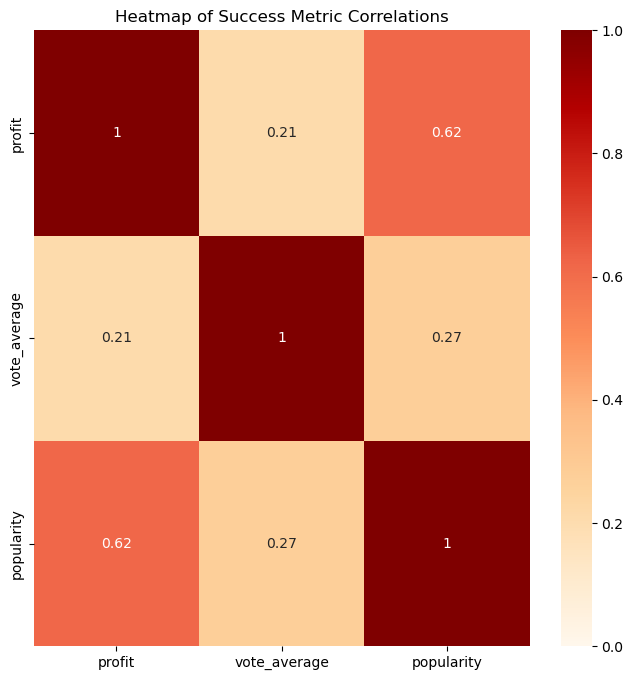

In [12]:
df['profit']=df['revenue']-df['budget']
plt.figure(figsize = (8,8))
sns.heatmap(data=df[['profit','vote_average','popularity']]\
            .corr(numeric_only=True),
            annot=True,
            cmap='OrRd',
            vmin=0,
            vmax=1) #Fixing Axis between 0 and 1

plt.title("Heatmap of Success Metric Correlations")
plt.show()

Seems that there is good overlap between popularity and profit, while average voting score seems a little bit unrelated. If we are interested in an overall metric of success that encompasses the different elements, it seems to be a good idea to use profit.

## *Insights*

### Genre

The first thing worth exploring is about the type of films that are successful. We do this by extracting the genres of the different films, and looking at frequency and average profit. Note: films can have more than one genre, which is why there are so many more total instances of genres than number of films.

In [13]:
genre_df=df.explode('genres') #Because most films have more than one genre, we separate each genre into a separate row so that we can group them together

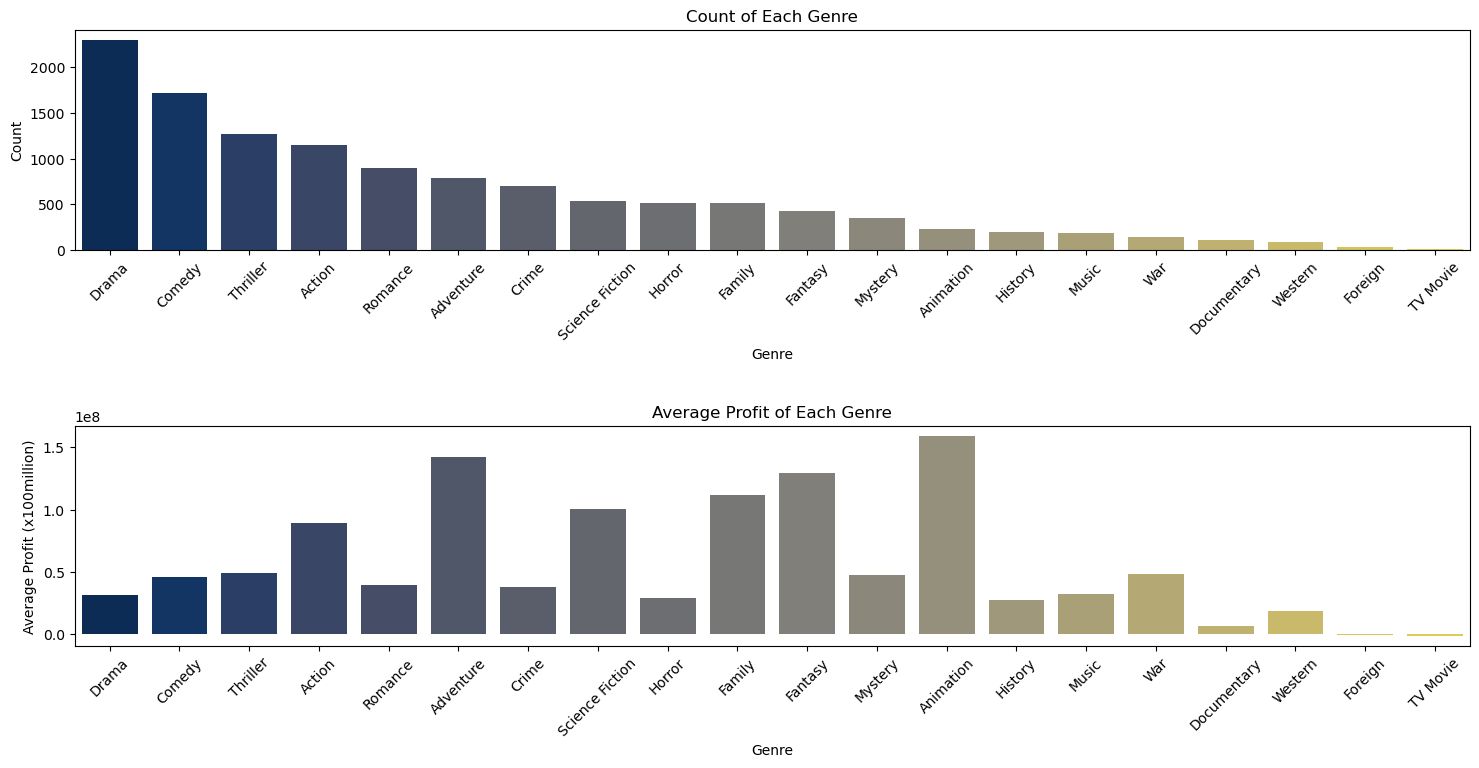

In [14]:
plt.figure(figsize = (18,8))

plt.subplot(2,1,1)
sns.barplot( data = genre_df.groupby('genres')[['title']]\
            .count()\
            .reset_index(drop=False)\
            .sort_values(by=['title'], ascending=False),
             x = 'genres',
             y = 'title',
             palette = 'cividis'
           )

plt.xticks(rotation=45, 
           horizontalalignment = 'center',
           fontweight = 'light',
           fontsize = 'medium' 
          )

plt.title('Count of Each Genre')
plt.ylabel("Count")
plt.xlabel("Genre")

plt.subplot(2,1,2)

order=genre_df.groupby('genres')[['title']]\
            .count()\
            .reset_index(drop=False)\
            .sort_values(by=['title'], ascending=False)\
            .genres.values #Preserve the order of the plot above, so that we can directly compare the two

sns.barplot( data = genre_df.groupby('genres')[['profit']]\
            .mean()\
            .reset_index(drop=False)\
            .sort_values(by=['profit'], ascending=False),
             x = 'genres',
             y = 'profit',
             palette = 'cividis',
            order=order
           )

plt.xticks(rotation=45, 
           horizontalalignment = 'center', 
           fontweight = 'light',
           fontsize = 'medium'
          )

plt.title('Average Profit of Each Genre') 
plt.ylabel("Average Profit (x100million)")
plt.xlabel("Genre")

plt.subplots_adjust(hspace=0.8)

plt.show()

The above plot is interesting. The most popular genres of films, like Drama, Comedy and Thriller are far from being the most profitable, ranking below Animation, Adventure and Fantasy. One potential explanation for this trend is that there is a high financial barrier to entry for these types of films, perhaps relating to CGI and production costs, whereas Dramas and Comedies may be cheap and easy to produce (they are often set in a real life setting rather than on an extravagant set), meaning smaller studios can make more of them, at a lower average profit. By creating a similar plot for average budget, we find some evidence for this hypothesis.

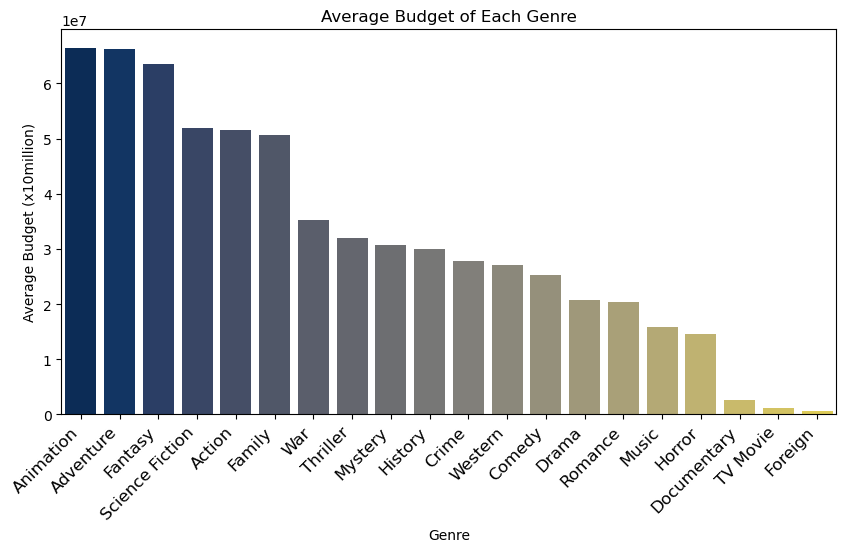

In [15]:
plt.figure(figsize = (10,5))
sns.barplot( data = genre_df.groupby('genres')[['budget']]\
            .mean()\
            .reset_index(drop=False)\
            .sort_values(by=['budget'], ascending=False),
             x = 'genres',
             y = 'budget',
             palette = 'cividis'
           )#we now select budget

plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large'
          )

plt.title('Average Budget of Each Genre')
plt.ylabel("Average Budget (x10million)")

plt.xlabel("Genre")
plt.show()

Notice those top four categories pop up again as the most expensive to make on average, whereas dramas and comedies are much lower down on the list.

### Studio

Another inevitably crucial part of understanding success of films, is who is producing them. So, we can similarly turn to look at the most profitable studios: 

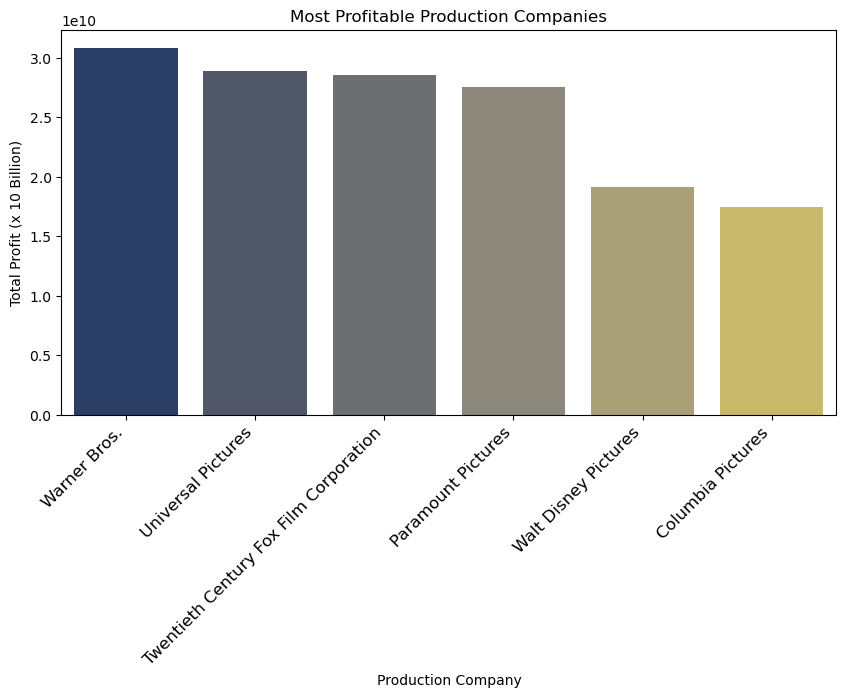

In [16]:
studio_df=df.explode('production_companies')#We do the exact same thing as we did for genre
plt.figure(figsize = (10,5))
ax=sns.barplot( data = studio_df.groupby('production_companies')[['profit']]\
            .sum()\
            .reset_index(drop=False)\
            .sort_values(by=['profit'], ascending=False)\
            .head(6),
             x = 'production_companies',
             y = 'profit',
             palette = 'cividis'
           )

plt.xticks(rotation=45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large'
          )

plt.title('Most Profitable Production Companies')
plt.ylabel("Total Profit (x 10 Billion)")
plt.xlabel("Production Company")

plt.show()

These are some of the most well-known brands in the industry, and so it is not particularly surprising to see them at the top of the list in terms of profitability. To explain this, it is worthwhile considering the extent of the market share each company has. We can do this by looking at the percentage of films produced by each of these 6 studios:

In [17]:
percentages=studio_df.groupby("production_companies")[["title"]]\
        .count()\
        .loc[['Warner Bros.', 'Universal Pictures',
       'Twentieth Century Fox Film Corporation', 'Paramount Pictures',
       'Walt Disney Pictures','Columbia Pictures']]\
        .reset_index(drop=False)\
        .rename(columns={'production_companies':'Studio','title':'Percentage of Films Produced (%)'})

total=len(df)

percentages[['Percentage of Films Produced (%)']]=round((100*percentages[['Percentage of Films Produced (%)']]/total),2)
percentages

,Studio,Percentage of Films Produced (%)
0,Warner Bros.,6.64
1,Universal Pictures,6.48
2,Twentieth Century Fox Film Corporation,4.62
3,Paramount Pictures,5.93
4,Walt Disney Pictures,2.37
5,Columbia Pictures,4.18


These six companies account for around 35% of all of the films produced in this dataset. I think this provides good insight into why exactly these big studios can be so profitable. Larger studios enjoy economies of scale (e.g. using big production lots rather than renting individual sets) and this allows them to lower costs and raise profits.

## *Specific Examples*

We have found two major insights into the likely success of a given film: there are some high profit genres (with high financial barrier to entry) and the most profitable studios dominate in terms of production volume. However, it is important to note that this is not sufficient reasoning to explain whether a film is a success or not. Take the two films below. The first film, the second iteration of the Pirates of the Caribbean franchise, was a huge success, and fits all of the relationships we considered, relating to studio and genre. However, 'The Lone Ranger' ought to be a success by all the same criteria. It had similar genres, runtime and budget, was produced by the same studios and even shared the same lead actor. Yet, it was the largest failure in this dataset.

In [18]:
df[(df.title=="Pirates of the Caribbean: Dead Man's Chest")|\
    (df.profit==min(df.profit))]\
    [['title','genres','runtime','production_companies','budget','popularity','profit']]

,title,genres,runtime,production_companies,budget,popularity,profit
12,Pirates of the Caribbean: Dead Man's Chest,"[Adventure, Fantasy, Action]",151.0,"[Walt Disney Pictures, Jerry Bruckheimer Films...",200000000,145.847379,865659812
13,The Lone Ranger,"[Action, Adventure, Western]",149.0,"[Walt Disney Pictures, Jerry Bruckheimer Films...",255000000,49.046956,-165710090


Clearly, there are important latent relationships determining what makes a successful film, after all, we do not have fine detail on the content of the film. But, this highlights the idea that while the factors considered do point towards what makes films successful, it is not sufficient to fully explain performance.